In [2]:
import requests
import pandas as pd
import json
from io import StringIO
import numpy as np
from collections import Counter

# Day 1

In [2]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/1/input", cookies=cookies)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')), sep = " ", names=["first"])

In [4]:
def count_increased(df):
    df = df.copy()
    df['second'] = df['first'].shift(-1)
    return (df['second'] > df['first']).sum()

In [5]:
count_increased(df)

1529

In [6]:
def count_increased_triplets(df):
    df = df.copy()
    df = df.rolling(window=3).sum()
    return count_increased(df)

In [7]:
count_increased_triplets(df)

1567

# Day 2

In [8]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/2/input", cookies=cookies)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')), sep = " ", names=["move", "value"])

In [9]:
def calculate_square_move_position(df):
    df = df.copy()
    agg_df = df.groupby("move").sum()
    fwd = agg_df.loc["forward", "value"]
    depth = agg_df.loc["down", "value"] - agg_df.loc["up", "value"]
    return fwd * depth

In [10]:
calculate_square_move_position(df)

1762050

In [11]:
def calculate_aim_move_position(df):
    df.copy()
    df = df.set_index("move")
    df['aim_diff'] = 0
    df['depth_diff'] = 0
    df['fwd_diff'] = 0
    df.loc["down", "aim_diff"] = df.loc["down", "value"]
    df.loc["up", "aim_diff"] = -df.loc["up", "value"]
    df['aim'] = df.aim_diff.cumsum()
    df.loc["forward", "fwd_diff"] = df.loc["forward"].value
    df.loc["forward", "depth_diff"] = df.loc["forward"].value * df.loc["forward"].aim
    return df['depth_diff'].sum() * df['fwd_diff'].sum()


In [12]:
calculate_aim_move_position(df)

1855892637

# Day 3

In [13]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/3/input", cookies=cookies)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')), sep = " ", names=["diag"], dtype=str)

In [14]:
def power_consumption(df):
    df = df.copy()
    bit_len = len(df.iloc[0, 0])
    df = df.diag.str.split("", expand = True).iloc[:, 1:-1]
    gamma_rate = int(df.mode().apply(lambda row: "".join(row.astype(str)), axis=1)[0], 2)
    epsilon_rate = 2**bit_len - 1 - gamma_rate
    return gamma_rate * epsilon_rate

In [15]:
power_consumption(df)

1092896

In [16]:
def bit_criteria(df, inversed=False):
    default = '0' if inversed else '1'
    new_df = df.copy()
    for i in new_df.columns:
        if new_df.shape[0] == 1:
            break
        counts = new_df.loc[:, i].value_counts(ascending=inversed)
        most_common = default if counts[0] == counts[1] else counts.index[0]
        new_df = new_df[new_df.loc[:, i] == most_common]
    return int(new_df.apply(lambda row: "".join(row.astype(str)), axis=1).iloc[0], 2)

In [17]:
def life_support(df):
    df = df.copy()
    df = df.diag.str.split("", expand = True).iloc[:, 1:-1].astype("category")
    oxygen = bit_criteria(df, False)
    co2 = bit_criteria(df, True)
    return oxygen * co2

In [18]:
life_support(df)

4672151

# Day 4

In [399]:
cookies = {
    "session": "53616c7465645f5f54e63355f047f61b6a213a59f854955cd6dc6ada7f002dba3e4e0a76cae96f63f2fb15570d7bb062; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/4/input", cookies=cookies)
content = resp.content.decode('utf-8').split('\n\n')
seq = pd.read_csv(StringIO(content[0]), header=None).T.iloc[:,0].values

cont_list = []
for cont in content[1:]:
    cont_list.append(pd.read_csv(StringIO(cont), sep = '\s+', header=None).values)
tables = np.stack(cont_list)

In [414]:
seq = np.array([7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1])

tables = np.array([
    [[22, 13, 17, 11,  0],
     [8, 2, 23, 4, 24],
     [21, 9, 14, 16, 7],
     [6, 10, 3, 18, 5],
     [1, 12, 20, 15, 19]],
    [[3, 15, 0, 2, 22],
     [9, 18, 13, 17, 5],
     [19, 8, 7, 25, 23],
     [20, 11, 10, 24, 4],
     [14, 21, 16, 12, 6]],
    [[14, 21, 17, 24,  4],
     [10, 16, 15, 9, 19],
     [18, 8, 23, 26, 20],
     [22, 11, 13, 6, 5],
     [2, 0, 12, 3, 7]],
])

In [415]:
def bingo_number(tables, seq):
    new = tables
    for i in seq:
        new = np.where(new == i, -1, new)
        cols_end = np.where(new.sum(axis=1) == -5)
        rows_end = np.where(new.sum(axis=2) == -5)
        if (cols_winner := cols_end[0].size) or (rows_winner := rows_end[0].size):
            winner_id = cols_end[0][0] if cols_winner else rows_end[0][0]
            break
    return new[winner_id][new[winner_id] != -1].sum() * i

In [416]:
bingo_number(tables, seq)

4512

In [410]:
def last_bingo_number(tables, seq):
    players = tables.shape[0]
    players_won = []
    winners_scores = []
    new = tables
    for i in seq:
        new = np.where(new == i, -1, new)
        cols_end = np.where(new.sum(axis=1) == -5)
        rows_end = np.where(new.sum(axis=2) == -5)
        if (cols_winner := cols_end[0].size) or (rows_winner := rows_end[0].size):
            winner_ids = np.unique(np.concatenate([cols_end[0], rows_end[0]]))
            for winner_id in winner_ids:
                players_won.append(winner_id)
                winners_scores.append(new[winner_id][new[winner_id] != -1].sum() * i)
                new[winner_id,:,:] = -10
        if len(players_won) == players:
            break
    return winners_scores[-1]

In [411]:
last_bingo_number(tables, seq)

21184

# Day 5

In [729]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/5/input", cookies=cookies)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')), sep = " ", header=None, names=['start', 'sep', 'end'])
df['start'] = df['start'].apply(lambda x: x.split(',')).apply(lambda x: [int(x[0]), int(x[1])])
df['end'] = df['end'].apply(lambda x: x.split(',')).apply(lambda x: [int(x[0]), int(x[1])])
coords = np.array(df[['start', 'end']].to_numpy().tolist())

In [728]:
def vertical_horizontal_coords(coords):
    x_pairs = coords[:, :, 0]
    y_pairs = coords[:, :, 1]

    ver_hor_coords = coords[np.logical_or(
            x_pairs[:, 0] == x_pairs[:, 1],
            y_pairs[:, 0] == y_pairs[:, 1]
        )
    ]
    return ver_hor_coords

def count_crossings_hor_ver(coords):
    max_coord = coords.max()
    vent_map = np.zeros([max_coord+1, max_coord+1])
    ver_hor_coords = vertical_horizontal_coords(coords)
    for (y1, x1), (y2, x2) in ver_hor_coords:
        if x1>x2: x1, x2 = x2, x1
        if y1>y2: y1, y2 = y2, y1
        vent_map[x1:(x2+1), y1:(y2+1)] += 1
    return vent_map[vent_map>1].size

In [730]:
count_crossings_hor_ver(coords)

6007

In [727]:
def count_crossings(coords):
    max_coord = coords.max()
    vent_map = np.zeros([max_coord+1, max_coord+1])
    for (y1, x1), (y2, x2) in coords:
        flip = False
        if x1>x2: x1, x2 = x2, x1; flip=not flip
        if y1>y2: y1, y2 = y2, y1; flip=not flip
        if x1 == x2 or y1 == y2:
            vent_map[x1:(x2+1), y1:(y2+1)] += 1
        else:
            if flip:
                value = np.fliplr(vent_map[x1:(x2+1), y1:(y2+1)])
            else:
                value = vent_map[x1:(x2+1), y1:(y2+1)]
            np.fill_diagonal(value, value.diagonal()+1)
    return vent_map[vent_map>1].size

In [731]:
count_crossings(coords)

19349

# Day 6

In [2]:
ages = np.array([3,4,3,1,2])

In [56]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/6/input", cookies=cookies)
ages = pd.read_csv(StringIO(resp.content.decode('utf-8')), header=None).T.loc[:,0].values

In [59]:
def new_day(ages):
    ages = ages - 1
    n = ages[ages==-1].size
    ages[ages==-1] = 6
    ages = np.concatenate([ages, np.array([8]*n)])
    return ages

def simulate_days(ages, days):
    for day in range(days):
        ages = new_day(ages)
    return ages.size

def simulate_days_fast(ages, days):
    fish_count = Counter(ages)
    for day in range(days):
        new_count = Counter()
        for key, value in fish_count.items():
            new_count[key-1] = fish_count[key]

        new_count[6] += new_count[-1]
        new_count[8] = new_count[-1]
        del new_count[-1]
        fish_count = new_count

    return sum(fish_count.values())

In [60]:
simulate_days_fast(ages, 256)

1640526601595

# Day 7

In [19]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/7/input", cookies=cookies)
data = pd.read_csv(StringIO(resp.content.decode('utf-8')), header=None).T.loc[:,0].values

In [24]:
def optimize(data, solution_vector):
    x = np.reshape(data, (1, -1)) - np.reshape(solution_vector, (-1, 1))
    moves = np.abs(x)
    return np.min(moves.sum(axis=1))

def nth_triangular(x):
    return np.array([range(x+1)]).sum()
nth_vec = np.vectorize(nth_triangular)

In [205]:
%time
solution_vector = np.array(range(max(data)+1))
optimize(data, solution_vector)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


329389

In [25]:
def calculate_crabs(data, type_='linear'):
    assert type_ in ['linear', 'triangle']
    diff_array = np.zeros(data.size)
    smallest = np.array([])
    for i in np.array(range(max(data)+1)):
        new = np.abs(data - i)
        if not smallest.size:
            smallest = new
            continue
        if type_ == 'linear':
            diff_array = new - smallest
        else:
            larger = new > smallest
            smaller = new < smallest
            diff_array[larger] = new[larger]
            diff_array[smaller] = -smallest[smaller]
        if diff_array.sum() < 0:
            smallest = new
    return smallest.sum() if type_ == 'linear' else nth_vec(smallest).sum()


In [26]:
%time
calculate_crabs(data, 'triangle')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


86397080

# Day 8

In [215]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/8/input", cookies=cookies)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')), sep = "|", header=None, names=['sequences', 'screen'])
df['sequences'] = df['sequences'].str.strip().str.split(' ')
df['screen'] = df['screen'].str.strip().str.split(' ')

In [261]:
sequences = ['acedgfb', 'cdfbe', 'gcdfa', 'fbcad', 'dab', 'cefabd', 'cdfgeb', 'eafb', 'cagedb', 'ab' ]
screen = ['cdfeb', 'fcadb', 'cdfeb', 'cdbaf']

In [262]:
def get_digit_map(sequences):
    lengths = list(map(len, sequences))
    unique_numbers = {
        1: 2,
        4: 4,
        7: 3,
        8: 7
    }
    digits_map = {k: sequences[lengths.index(v)] for k, v in unique_numbers.items()}
    digits_map[9] = [seq for seq in sequences if len(seq & (digits_map[4] | digits_map[7])) == 5 and len(seq) == 6][0]
    digits_map[6] = [seq for seq in sequences if len(seq & (digits_map[8] - digits_map[7])) == 4 and len(seq) == 6][0]
    digits_map[5] = [seq for seq in sequences if seq == digits_map[9] & digits_map[6] and len(seq) == 5][0]
    digits_map[3] = [seq for seq in sequences if len(seq & digits_map[9]) == 5 and seq != digits_map[5] and len(seq) == 5][0]
    digits_map[2] = [seq for seq in sequences if len(seq & digits_map[6]) == 4 and len(seq) == 5 and seq != digits_map[5] and seq!=digits_map[3]][0]
    digits_map[0] = [seq for seq in sequences if seq not in digits_map.values()][0]
    
    return [digits_map[i] for i in sorted(digits_map.keys())]

In [263]:
def translate_numbers(sequences, screen):
    sequences = list(map(set, sequences))
    screen = list(map(set, screen))
    digit_map = get_digit_map(sequences)
    return [digit_map.index(k) for k in screen]

In [266]:
translate_numbers(sequences, screen)

[5, 3, 5, 3]

In [ ]:
df['result'] = df.apply(lambda x: np.array(translate_numbers(x['sequences'], x['screen'])), axis=1)

In [ ]:
df['result'].apply(lambda x: np.isin(x, [1, 4, 7, 8]).sum()).sum()

In [ ]:
df['result'].apply(lambda x: (x * np.array([1000, 100, 10, 1]).T).sum()).sum()

# Day 9

In [3]:
from numpy.lib.stride_tricks import sliding_window_view

In [6]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/9/input", cookies=cookies)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')), header=None, names=['map'])
df.map = df.map.apply(lambda x: np.array([int(x) for x in x]))
x = np.stack(df.map.values)

In [5]:
x = np.array([[2,1,9,9,9,4,3,2,1,0],
[3,9,8,7,8,9,4,9,2,1],
[9,8,5,6,7,8,9,8,9,2],
[8,7,6,7,8,9,6,7,8,9],
[9,8,9,9,9,6,5,6,7,8]])


In [936]:
def is_tube(x):
    arr = x.copy()
    arr[0, 0] = 10
    arr[0, 2] = 10
    arr[2, 0] = 10
    arr[2, 2] = 10
    return [arr[1,1]] if np.unravel_index(arr.argmin(), arr.shape) == (1,1) else []

is_tube(arr)

[]

In [949]:
x_padded = np.ones((x.shape[0]+2, x.shape[1]+2)) * 10
x_padded[1:-1, 1:-1] = x
x_padded
is_drop_l = []
windows = sliding_window_view(x_padded, [3, 3])
for window in windows.reshape(windows.shape[0] * windows.shape[1],3,3):
    is_drop_l.extend(is_tube(window))
(np.array(is_drop_l) + 1).sum()

439.0

In [9]:
def has_ones_neib(x):
    arr = x.copy()
    arr[0, 0] = 0
    arr[0, 2] = 0
    arr[2, 0] = 0
    arr[2, 2] = 0
    #print(arr)
    return np.stack(np.where(arr == 1)).T - 1

In [10]:
res_array = x.copy()
res_array[res_array!=9] = 1
res_array[res_array==9] = 0

In [11]:
res_padded = np.zeros((res_array.shape[0]+2, res_array.shape[1]+2))
res_padded[1:-1, 1:-1] = res_array
is_drop_l = []
res_array2 = np.zeros(res_array.shape)
res2_padded = np.zeros((res_array2.shape[0]+2, res_array2.shape[1]+2))
res2_padded[1:-1, 1:-1] = res_array2
windows = sliding_window_view(res_padded, [3, 3])
res_windows = sliding_window_view(res2_padded, [3, 3])
group_counter = 2
for _ in range(2):
    for i in np.arange(res_array.shape[0]):
        for j in np.arange(res_array.shape[1]):
            has_ones = has_ones_neib(windows[i, j])
            if len(has_ones) > 0 and windows[i,j][1,1] == 1:
                groups = np.array([])
                for ind in has_ones:

                    groups = np.append(groups, [res_array2[i+ind[0], j+ind[1]]])
                min_group = groups[groups>0].min() if len(groups[groups>0]) else 0
                if min_group:
                    group_to_fill = min_group
                else:
                    group_to_fill = group_counter
                    group_counter +=1

                for ind in has_ones:
                    res_array2[i+ind[0], j+ind[1]]  = group_to_fill

    res_array2 = res_array2.astype(int)

In [12]:
size_map = {}
for n in np.unique(res_array2):
    if n != 0:
        size_map[n] = res_array2[res_array2==n].size
np.prod(pd.Series(size_map).sort_values(ascending=False).iloc[:3])

900900

In [13]:
import matplotlib.pyplot as plt

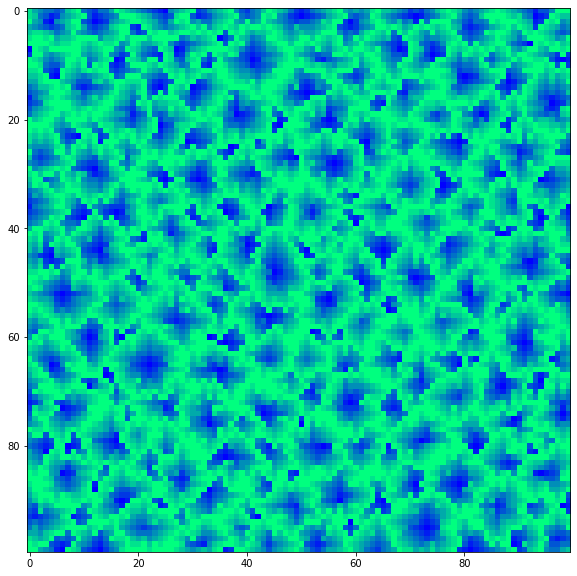

In [43]:
plt.figure(figsize=(10, 10))

plt.imshow(x,  cmap=plt.get_cmap('winter'))
plt.show()

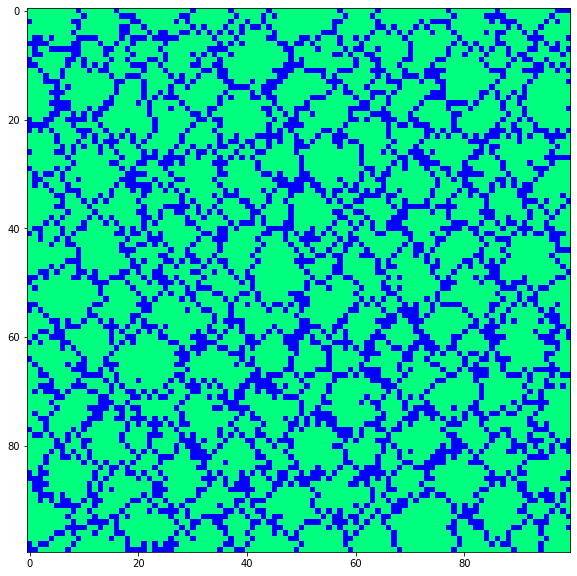

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(res_array, interpolation='nearest',  cmap=plt.get_cmap('winter'))
plt.show()

# Day 10

In [124]:
cookies = {
    "session": "53616c7465645f5ff7db31f30dbc39e8efa073d984f1019c423857460dd4104435d33265120f00431aafacd6a212e84f; _ga=GA1.2.1167308080.1638436952; _gid=GA1.2.1150076090.1638436952"
}
resp = requests.get("https://adventofcode.com/2021/day/10/input", cookies=cookies)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')), sep = "|", header=None, names=['seq'])
data = df.seq.values.tolist()

In [109]:
data = [
    '[({(<(())[]>[[{[]{<()<>>',
    '[(()[<>])]({[<{<<[]>>(',
    '{([(<{}[<>[]}>{[]{[(<()>',
    '(((({<>}<{<{<>}{[]{[]{}',
    '[[<[([]))<([[{}[[()]]]',
    '[{[{({}]{}}([{[{{{}}([]',
    '{<[[]]>}<{[{[{[]{()[[[]',
    '[<(<(<(<{}))><([]([]()',
    '<{([([[(<>()){}]>(<<{{',
    '<{([{{}}[<[[[<>{}]]]>[]]'
]

In [108]:
points_map = {
    ')': 3,
    ']': 57,
    '}': 1197,
    '>': 25137
}

matching_pairs = {
    '(': ')',
    '[': ']',
    '{': '}',
    '<': '>' 
}

def corrupted_points(data, points_map):

    points = 0
    for seq in data:
        stack = list()
        try:
            for char in seq:
                if not len(stack):
                    stack.append(char)
                    continue
                x = stack.pop()
                if matching_pairs[x] == char:
                    continue
                else:
                    stack.append(x)
                    stack.append(char)
        except KeyError as exc:
            points += points_map[exc.args[0]]

    return points

corrupted_points(data, points_map)
    

345441

In [139]:
points_map = {
    ')': 1,
    ']': 2,
    '}': 3,
    '>': 4
}

def incomplete_points(data, points_map):
    points = []
    for seq in data:
        stack = list()
        try:
            for char in seq:
                if not len(stack):
                    stack.append(char)
                    continue
                x = stack.pop()
                if matching_pairs[x] == char:
                    continue
                else:
                    stack.append(x)
                    stack.append(char)
            if len(stack):
                matched = map(lambda x: matching_pairs[x], reversed(stack))
                points_arr = map(lambda x: points_map[x],w matched)
                points_loc = 0
                for p in points_arr:
                    points_loc *= 5
                    points_loc += p
                points.append(points_loc)

        except KeyError as exc:
            continue
    return int(np.median(points))


incomplete_points(data, points_map)



3235371166